In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [40]:
# load train and test file
train = pd.read_csv('./data/train.csv', parse_dates=['Original_Quote_Date'], index_col='QuoteNumber')
test = pd.read_csv('./data/test.csv', parse_dates=['Original_Quote_Date'], index_col='QuoteNumber')

In [41]:
# number of columns
print len(train.columns)

298


## Exploratory Data Analysis

In [42]:
# check to see if there are missing values
def get_cols_with_missing_values(df):
    col_with_missing_val = df.isnull().any()
    return [col for col in col_with_missing_val.index.values if col_with_missing_val.ix[col]]

In [43]:
print get_cols_with_missing_values(train)

['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4', 'PropertyField29', 'PropertyField32', 'PropertyField34', 'PropertyField36', 'PropertyField38']


In [44]:
print get_cols_with_missing_values(test)

['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4', 'PropertyField5', 'PropertyField29', 'PropertyField30', 'PropertyField32', 'PropertyField34', 'PropertyField36', 'PropertyField38']


In [45]:
# lets drop missing data for now
train_with_no_missing_values = train.dropna()

In [46]:
# lets see the distribution of the target variable
train_with_no_missing_values.QuoteConversion_Flag.value_counts()

0    55240
1        2
Name: QuoteConversion_Flag, dtype: int64

In [47]:
train.QuoteConversion_Flag.value_counts()

0    211859
1     48894
Name: QuoteConversion_Flag, dtype: int64

** Most of the positive labels have missing values. **

In [32]:
# lets find out how many categorical features are there
print (train.select_dtypes(['object']).shape[1])

27


** 27 of the features are categorical. **

In [48]:
categorical_features = train.select_dtypes(['object']).columns

In [55]:
categorical_features

Index([u'Field6', u'Field10', u'Field12', u'CoverageField8', u'CoverageField9',
       u'SalesField7', u'PersonalField7', u'PersonalField16',
       u'PersonalField17', u'PersonalField18', u'PersonalField19',
       u'PropertyField3', u'PropertyField4', u'PropertyField5',
       u'PropertyField7', u'PropertyField14', u'PropertyField28',
       u'PropertyField30', u'PropertyField31', u'PropertyField32',
       u'PropertyField33', u'PropertyField34', u'PropertyField36',
       u'PropertyField37', u'PropertyField38', u'GeographicField63',
       u'GeographicField64'],
      dtype='object')

In [64]:
def print_group_by_categorical_dist(df, categorical_features):
    for col in categorical_features:
        print df.groupby([col, 'QuoteConversion_Flag']).size()
        print '\n\n'

In [65]:
print_group_by_categorical_dist(train, categorical_features)

Field6  QuoteConversion_Flag
A       0                          35
B       0                       74858
        1                       19836
C       0                        4956
        1                         704
D       0                         107
        1                         133
E       0                       22646
        1                        3417
F       0                       48476
        1                       20577
J       0                       48660
        1                        3122
K       0                       12121
        1                        1105
dtype: int64



Field10  QuoteConversion_Flag
1,113    0                       42039
         1                        2901
1,165    0                       18745
         1                        1326
1,480    0                       10088
         1                        1699
1,487    0                       17515
         1                        2422
548      0                       28151
    

## Add time related features

In [66]:
train['year'] = train.Original_Quote_Date.dt.year
train['month'] = train.Original_Quote_Date.dt.month

In [78]:
y = train.groupby(['year', 'QuoteConversion_Flag']).size()
y = y.unstack(1)

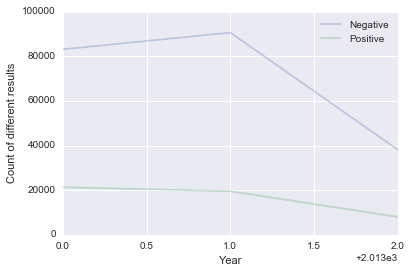

In [79]:
plt.plot(y.index.values, y[0], label='Negative', c='b', alpha=0.3)
plt.plot(y.index.values, y[1], label='Positive', c='g', alpha=0.3)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Count of different results');

In [72]:
g = train.groupby(['month', 'QuoteConversion_Flag']).size()
g = g.unstack(1)

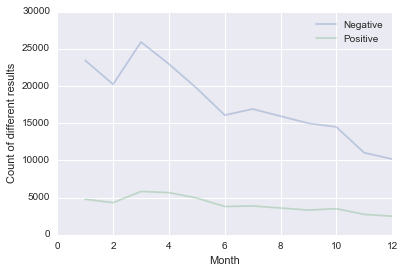

In [76]:
plt.plot(g.index.values, g[0], label='Negative', c='b', alpha=0.3)
plt.plot(g.index.values, g[1], label='Positive', c='g', alpha=0.3)
plt.legend(loc='best')
plt.xlabel('Month')
plt.ylabel('Count of different results');

In [99]:
# Relationship between year and month of original quote with conversion flag
ym = train.groupby(['year', 'month', 'QuoteConversion_Flag']).size()
ym = ym.unstack(2)

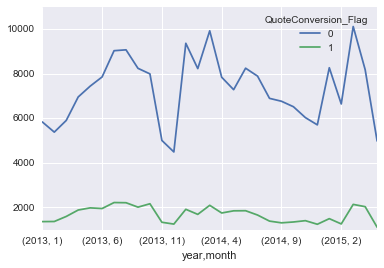

In [107]:
ym.plot();